# 📧 Email Spam Detector (Logistic Regression)
This project builds a binary classifier to detect spam emails using logistic regression. We’ll use the UCI SMS Spam Collection dataset and explore two text vectorization methods:

- Bag of Words (BoW)
- TF-IDF

We’ll evaluate performance using confusion matrix, precision, recall, and accuracy.


# Install dependencies (in case not already available)


In [2]:
!pip install -q pandas scikit-learn

## 📚 Step 1: Import Required Libraries
We import necessary Python packages including pandas, sklearn, and visualization libraries.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


## 📥 Step 2: Load Dataset
We load the SMS Spam Collection dataset directly from GitHub. It contains two columns: the label (`spam` or `ham`) and the message text.


In [4]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Show first few rows
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 🔍 Step 3: Explore and Preprocess Data
We convert the labels to binary (ham=0, spam=1) and split the dataset for training/testing.


In [5]:
print("Class distribution:\n", df['label'].value_counts())

# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Class distribution:
 label
ham     4825
spam     747
Name: count, dtype: int64


## 🧠 Step 4: Text Vectorization
We vectorize the text using:
- **Bag of Words (BoW)**
- **TF-IDF**


In [6]:
# BoW
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


## 🤖 Step 5: Train Logistic Regression Model
Train separate logistic regression models on both BoW and TF-IDF features.


In [15]:
model_bow = LogisticRegression(max_iter=1000)
model_bow.fit(X_train_bow, y_train)

model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)

## 📊 Step 6: Define Evaluation Function
We’ll use accuracy, precision, recall, and confusion matrix to evaluate the model.


In [8]:
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n🔎 Evaluation for {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## ✅ Step 7: Evaluate Both Models
Compare performance of models trained on BoW and TF-IDF features.



🔎 Evaluation for Logistic Regression with BoW
Accuracy: 0.9883
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



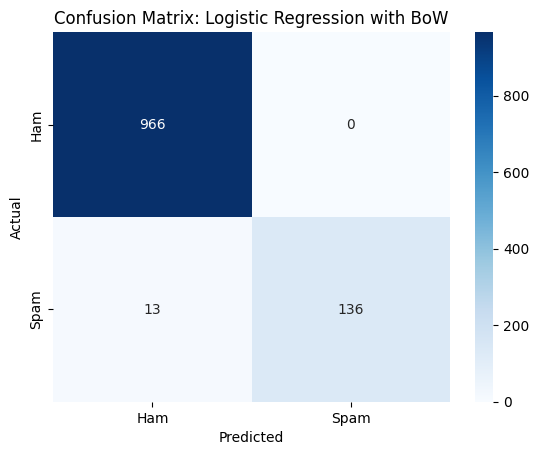


🔎 Evaluation for Logistic Regression with TF-IDF
Accuracy: 0.9749
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



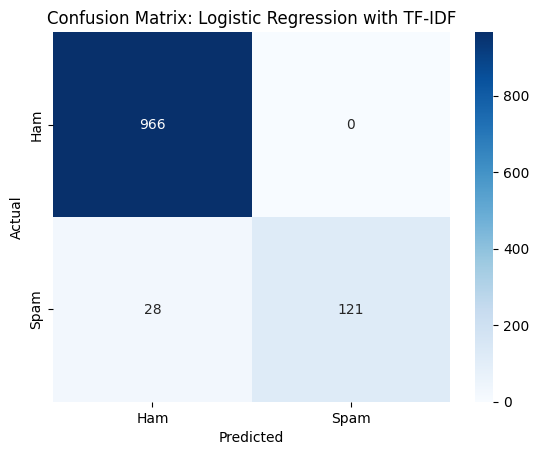

In [9]:
# Evaluate BoW
evaluate_model(model_bow, X_test_bow, y_test, name="Logistic Regression with BoW")

# Evaluate TF-IDF
evaluate_model(model_tfidf, X_test_tfidf, y_test, name="Logistic Regression with TF-IDF")


## 📈 Step 8: Compare BoW vs TF-IDF Performance
We visualize accuracy, precision, recall, and F1-score for both models using a bar chart.


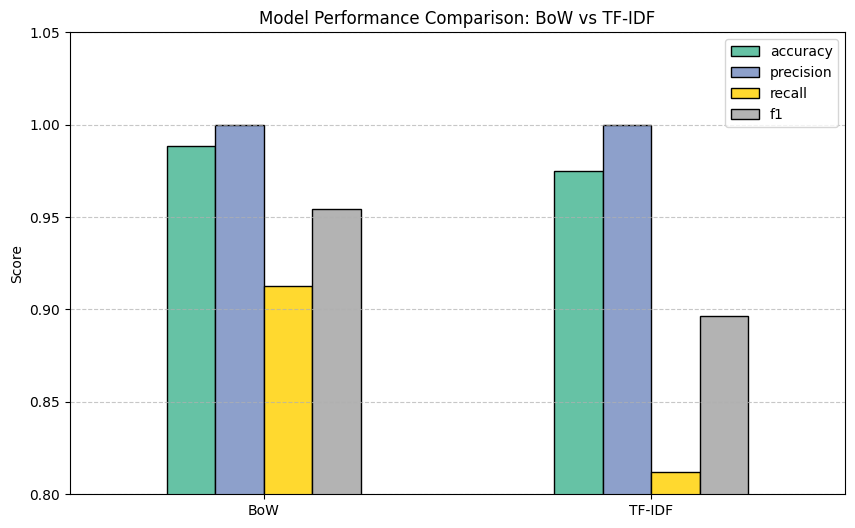

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect metrics for both models
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

# Metrics for both models
metrics_bow = get_metrics(model_bow, X_test_bow, y_test)
metrics_tfidf = get_metrics(model_tfidf, X_test_tfidf, y_test)

# DataFrame for plotting
metrics_df = pd.DataFrame([metrics_bow, metrics_tfidf], index=["BoW", "TF-IDF"])

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', edgecolor='black')
plt.title("Model Performance Comparison: BoW vs TF-IDF")
plt.ylabel("Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.show()


## 🧾 Step 10: Word Importance (Top Spam/Ham Words)
We visualize the most influential words in predicting spam and ham using the model's learned coefficients.


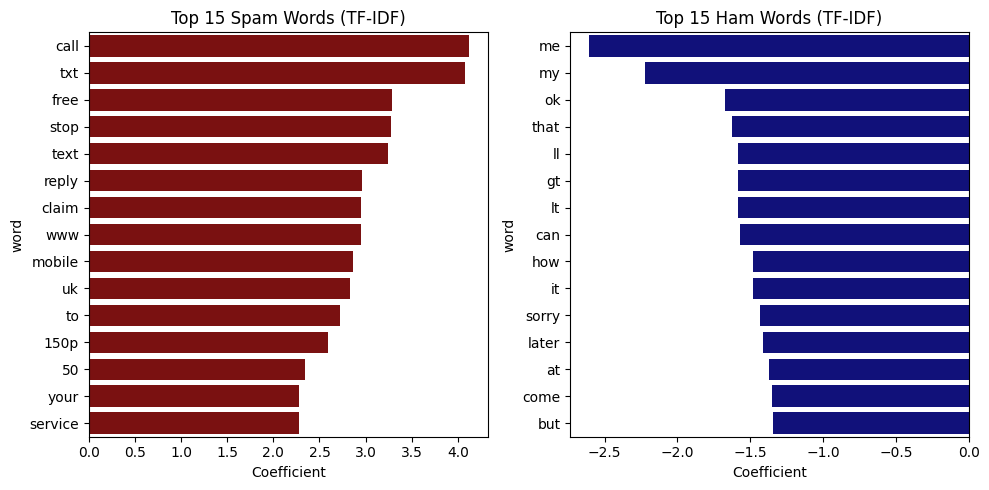

In [34]:
def plot_top_words(vectorizer, model, top_n=15):
    # Get feature names and coefficients
    feature_names = vectorizer.get_feature_names_out()
    coefs = model.coef_[0]

    # Create DataFrame
    coef_df = pd.DataFrame({'word': feature_names, 'coef': coefs})

    # Top spam words (largest positive coefficients)
    top_spam = coef_df.sort_values(by='coef', ascending=False).head(top_n)

    # Top ham words (largest negative coefficients)
    top_ham = coef_df.sort_values(by='coef').head(top_n)

    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.barplot(data=top_spam, x='coef', y='word', ax=axes[0], color='darkred')
    axes[0].set_title(f'Top {top_n} Spam Words (TF-IDF)')
    axes[0].set_xlabel("Coefficient")

    sns.barplot(data=top_ham, x='coef', y='word', ax=axes[1], color='darkblue')
    axes[1].set_title(f'Top {top_n} Ham Words (TF-IDF)')
    axes[1].set_xlabel("Coefficient")

    plt.tight_layout()
    plt.show()

# Plot word importance for TF-IDF model
plot_top_words(vectorizer_tfidf, model_tfidf)
